In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [3]:
# 4 CPUs
file = '/home/yongha/mcwa/1DFreeFormDQN/experiments/DQN/2022_09_16_14_07_47/wl900.0_angle60.0_ncells64/comp_table.csv'
df = pd.read_csv(file)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.describe()

,reti-1,reti0,reti+1,mcwat-1,mcwat0,mcwat+1,mcwas-1,mcwas0,mcwas+1,t_reti,tpr_reti,t_mcwat,tpr_mcwat,t_mcwas,tpr_mcwas
count,608609.000000,6.086090e+05,608609.000000,608609.000000,6.086090e+05,608609.000000,608609.000000,6.086090e+05,608609.000000,608609.000000,608609.000000,608609.000000,608609.000000,608609.000000,608609.000000
mean,0.126804,4.578344e-01,0.235288,0.126996,4.570581e-01,0.235501,0.126996,4.570581e-01,0.235501,0.138211,0.238614,0.024074,0.084647,0.038791,0.154944
std,0.121978,3.324059e-01,0.243418,0.122085,3.320994e-01,0.243354,0.122085,3.320994e-01,0.243354,0.027136,0.124969,0.004540,0.017736,0.009043,0.036032
min,0.000000,1.768111e-07,0.000000,0.000000,1.826128e-07,0.000000,0.000000,1.826128e-07,0.000000,0.106503,0.001686,0.012113,0.041964,0.031588,0.126286
25%,0.034155,1.249704e-01,0.049999,0.034261,1.246108e-01,0.050159,0.034261,1.246108e-01,0.050159,0.123665,0.149388,0.021382,0.073447,0.032864,0.131376
50%,0.088853,4.421429e-01,0.145052,0.089048,4.405023e-01,0.145436,0.089048,4.405023e-01,0.145436,0.125269,0.324188,0.022774,0.078817,0.033321,0.133198
75%,0.184268,7.891907e-01,0.338785,0.184561,7.879953e-01,0.339122,0.184561,7.879953e-01,0.339122,0.136313,0.328138,0.024308,0.084765,0.041600,0.165721
max,0.955434,9.989689e-01,0.989897,0.954781,9.990001e-01,0.989790,0.954781,9.990001e-01,0.989790,0.505572,0.343524,0.072359,0.236092,0.118583,0.410744


# TMM to SMM

In [5]:
A, B = 'mcwat', 'mcwas'

In [6]:
df['gap-1'] = df[f'{A}-1'] - df[f'{B}-1']
df['gap0'] = df[f'{A}0'] - df[f'{B}0']
df['gap+1'] = df[f'{A}+1'] - df[f'{B}+1']
df['t_gap'] = df[f't_{A}'] - df[f't_{B}']
df['tpr_gap'] = df[f'tpr_{A}'] - df[f'tpr_{B}']

# Benchmark

## difference in transmittance

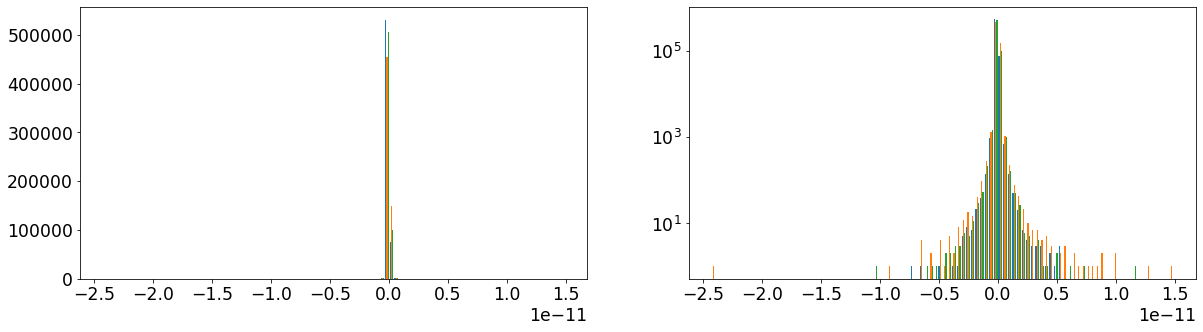

In [7]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df['gap-1'], df['gap0'], df['gap+1']], bins=100)
axes[1].hist([df['gap-1'], df['gap0'], df['gap+1']], bins=100)
axes[1].set_yscale('log')
plt.show()

In [8]:
df[['gap-1','gap0','gap+1']].describe().T

,count,mean,std,min,25%,50%,75%,max
gap-1,608609.0,1.433553e-16,6.613813e-14,-7.188805e-12,-1.140060e-14,0.000000e+00,1.137979e-14,5.397710e-12
gap0,608609.0,1.824867e-16,1.069800e-13,-2.428047e-11,-2.581269e-14,9.714451e-17,2.609024e-14,1.492390e-11
gap+1,608609.0,-1.037970e-16,8.033756e-14,-1.020509e-11,-1.437739e-14,0.000000e+00,1.426637e-14,1.155848e-11


In [9]:
pd.concat([df['gap-1'], df['gap0'], df['gap+1']]).describe()

count    1.825827e+06
mean     7.401502e-17
std      8.616482e-14
min     -2.428047e-11
25%     -1.620926e-14
50%      0.000000e+00
75%      1.620926e-14
max      1.492390e-11
dtype: float64

In [46]:
a=pd.concat([df['gap-1'], df['gap0'], df['gap+1']])
cut = 2.6E-13
b=a[abs(a) < cut]
b.count()/a.count() *100

99.00390343663446

In [26]:
df[abs(df['gap-1'])>cut][[f'{A}-1', f'{B}-1', 'gap-1']].sort_values('gap-1')

,mcwat-1,mcwas-1,gap-1


In [27]:
df[abs(df['gap0'])>cut][[f'{A}0', f'{B}0', 'gap0']].sort_values('gap0')

,mcwat0,mcwas0,gap0


In [28]:
df[abs(df['gap+1'])>cut][[f'{A}+1', f'{B}+1', 'gap+1']].sort_values('gap+1')

,mcwat+1,mcwas+1,gap+1


## Normalized abs(difference in transmittance) 

In [33]:
cut = 0.01

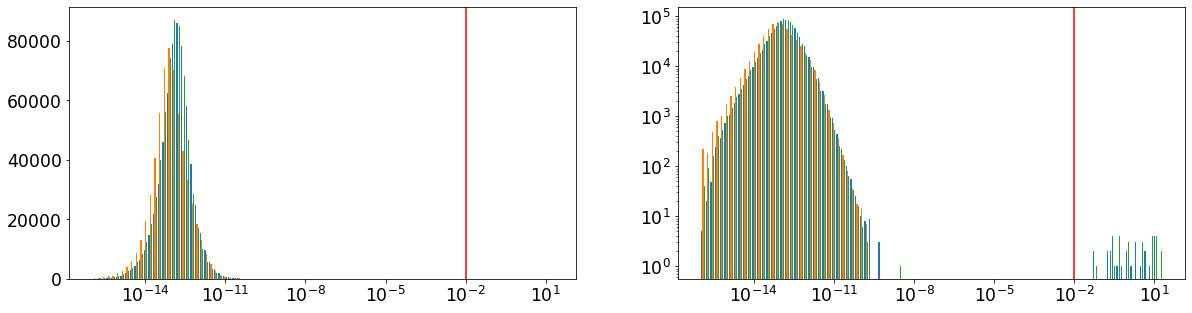

In [29]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(cut, c='r')
axes[1].axvline(cut, c='r')

axes[0].hist([abs(df['gap-1']/df[f'{A}-1']), abs(df['gap0']/df[f'{A}0']), abs(df['gap+1']/df[f'{A}+1'])], bins=np.logspace(np.log10(1E-16), np.log10(20),100))
axes[0].set_xscale('log')

axes[1].hist([abs(df['gap-1']/df[f'{A}-1']), abs(df['gap0']/df[f'{A}0']), abs(df['gap+1']/df[f'{A}+1'])], bins=np.logspace(np.log10(1E-16), np.log10(20),100))
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.show()

right side of vertical red line: normalized error >= 1 %

orange is 0th order

In [30]:
df[abs(df['gap-1']/df[f'{A}-1'])>cut][[f'{A}-1', f'{B}-1', 'gap-1']].sort_values('gap-1')

,mcwat-1,mcwas-1,gap-1
15408,2.123246e-28,2.616370e-28,-4.931233e-29
397025,4.608935e-30,3.878159e-29,-3.417266e-29
409624,1.696826e-29,3.716373e-29,-2.019547e-29
8472,2.514653e-32,4.611096e-30,-4.585950e-30
187144,2.514653e-32,4.611096e-30,-4.585950e-30
370407,1.882113e-31,2.080262e-30,-1.892051e-30
21469,1.882113e-31,2.080262e-30,-1.892051e-30
211535,5.233428e-31,2.394893e-30,-1.871550e-30
363501,1.662338e-31,2.028611e-30,-1.862378e-30
82988,1.662338e-31,2.028611e-30,-1.862378e-30


In [31]:
df[abs(df['gap0']/df[f'{A}0'])>cut][[f'{A}0', f'{B}0', 'gap0']].sort_values('gap0')

,mcwat0,mcwas0,gap0


In [32]:
df[abs(df['gap+1']/df[f'{A}+1'])>cut][[f'{A}+1', f'{B}+1', 'gap+1']].sort_values('gap+1')

,mcwat+1,mcwas+1,gap+1
409624,2.444636e-29,2.108036e-28,-1.863573e-28
8472,3.626643e-31,4.753130e-30,-4.390465e-30
187144,3.626643e-31,4.753130e-30,-4.390465e-30
363501,2.494161e-31,2.238260e-30,-1.988844e-30
82988,2.494161e-31,2.238260e-30,-1.988844e-30
211535,4.125377e-31,1.888210e-30,-1.475672e-30
7475,1.234651e-31,1.458717e-30,-1.335252e-30
79794,1.234651e-31,1.458717e-30,-1.335252e-30
370407,3.936793e-32,1.326363e-30,-1.286995e-30
21469,3.936793e-32,1.326363e-30,-1.286995e-30


# benchmark - simulation time

## run time by time.time()

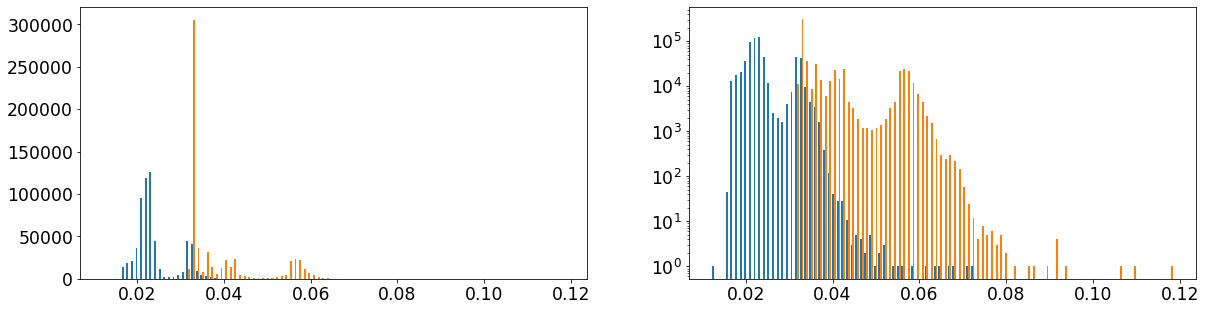

In [18]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df[f't_{A}'],df[f't_{B}']], bins=100)
axes[1].hist([df[f't_{A}'],df[f't_{B}']], bins=100, log=True)
plt.show()

Blue is  meent-TMM, Oragne is meent-SMM

## SMM time / TMM time

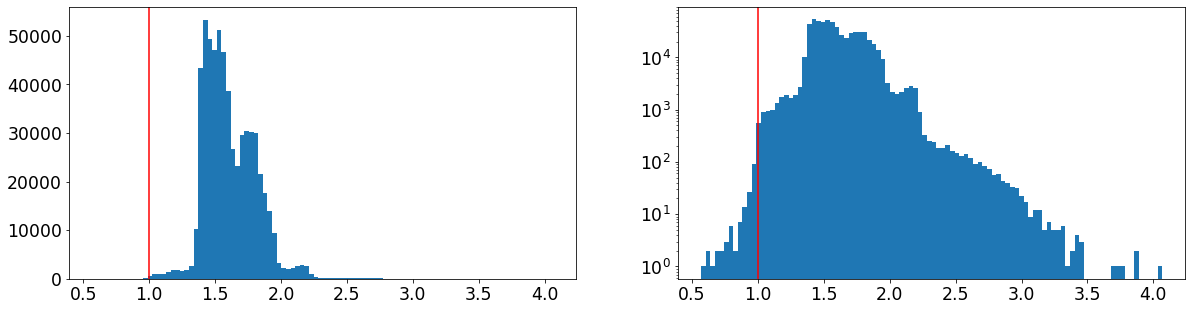

In [19]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(1, c='r')
axes[1].axvline(1, c='r')
axes[0].hist((df[f't_{B}'])/df[f't_{A}'], bins=100)
axes[1].hist((df[f't_{B}'])/df[f't_{A}'], bins=100)
axes[1].set_yscale('log')
plt.show()

In [20]:
pd.DataFrame((df[f't_{B}']/df[f't_{A}']).describe()).T

,count,mean,std,min,25%,50%,75%,max
0,608609.0,1.61174,0.198551,0.567782,1.464237,1.573006,1.747178,4.066429


meent-TMM is faster 1.6 times than SMM.

right side of red line: TMM is faster

## time.process_time()

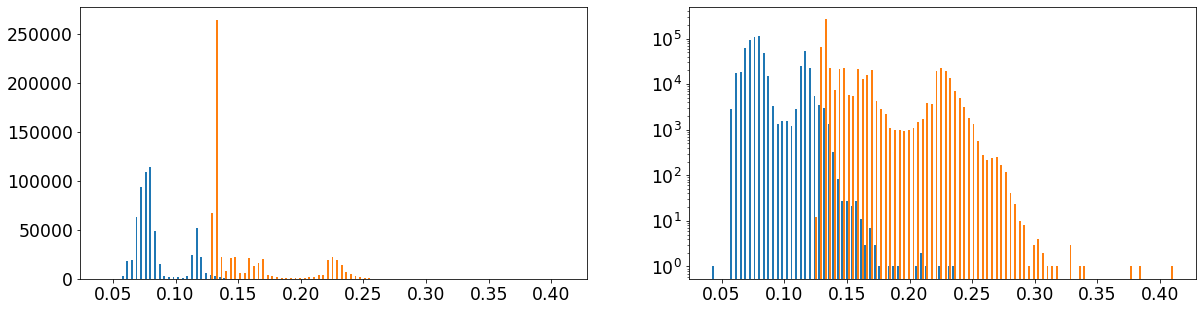

In [21]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df[f'tpr_{A}'],df[f'tpr_{B}']], bins=100)
axes[1].hist([df[f'tpr_{A}'],df[f'tpr_{B}']], bins=100, log=True)
plt.show()

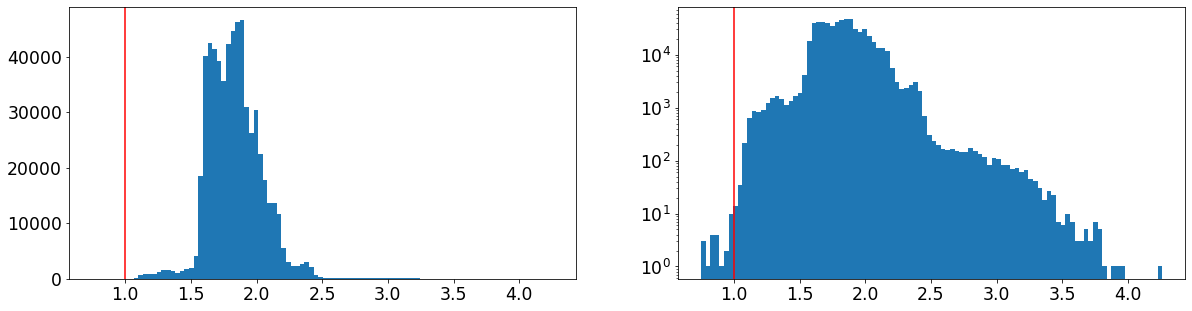

In [22]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(1, c='r')
axes[1].axvline(1, c='r')
axes[0].hist((df[f'tpr_{B}'])/df[f'tpr_{A}'], bins=100)
axes[1].hist((df[f'tpr_{B}'])/df[f'tpr_{A}'], bins=100)
axes[1].set_yscale('log')
plt.show()

In [23]:
pd.DataFrame((df[f'tpr_{B}']/df[f'tpr_{A}']).describe()).T

,count,mean,std,min,25%,50%,75%,max
0,608609.0,1.835199,0.207671,0.749124,1.688946,1.82247,1.955753,4.260806


hard to tell...